<a href="https://colab.research.google.com/github/davidjjeong/multiple_linear_regression/blob/main/MLR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install seaborn watermark

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.7 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.3 which is incompatible.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import scipy.stats as stats
import scipy as sp
import itertools
import time
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import pylab

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

**Practice Example 1: Ram Price Dataset**

Data Structure:

* Data: Change in Ram Price from 1957 to 2015
* Observations: 333
* Explanatory Variable: Year
* Response Variable: Price



     Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
..          ...      ...           ...
328         328  2015.58  4.500000e-03
329         329  2015.67  4.300000e-03
330         330  2015.75  4.200000e-03
331         331  2015.83  3.800000e-03
332         332  2015.92  3.700000e-03

[333 rows x 3 columns]


Text(0, 0.5, 'Ram Price($ per Megabyte)')

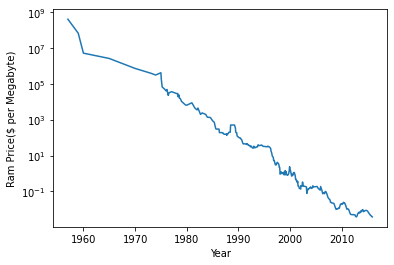

In [5]:
# Load ram_prices data
ram_prices = pd.read_csv('/content/drive/MyDrive/MLR/data/ram_price.csv')
print(ram_prices)
type(ram_prices)

# Plot the observations in the data, with log scaling on the y-axis
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Ram Price($ per Megabyte)")

Text(0, 0.5, 'Raw Ram Price')

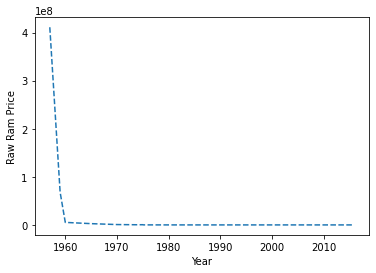

In [6]:
plt.plot(ram_prices.date, ram_prices.price, '--')
plt.xlabel("Year")
plt.ylabel("Raw Ram Price")

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# Training: Before 2000
# Test: After 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# Only use date for X variable, and slice the vector
X_train = data_train.date[:, np.newaxis]

# Change y to log scale to create a linear relationship between X and Y
y_train = np.log(data_train.price)

# Train the MLR model
linear_reg = LinearRegression().fit(X_train, y_train)

# Predict for all periods from 1957 to 2015
X_all = ram_prices.date[:, np.newaxis]

pred_lr = linear_reg.predict(X_all)

# Change from log scale to real raw price
price_lr = np.exp(pred_lr)

Text(0, 0.5, 'Ram Price in Log Scale')

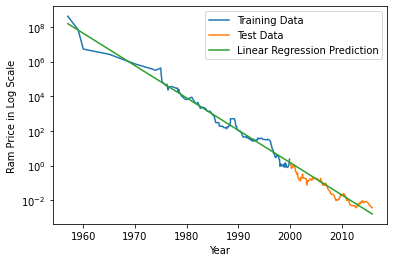

In [9]:
plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Prediction")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Ram Price in Log Scale")

In [10]:
# Check Linear Reg Coefficient
linear_reg.coef_
print('연도에 따른 회귀계수 (로그변환): ', linear_reg.coef_)

연도에 따른 회귀계수 (로그변환):  [-0.42880156]


**Practice Example 2: California Housing Dataset**

Data Structure:

* Data: 1990 Housing Price of Each District Within California
* Observations: 20640
* Explanatory Variables: 8
  * MedInc: 행정 구역 내 소득의 중앙값
  * HouseAge: 행정 구역 내 주택 연식의 중앙값
  * AveRooms: 평균 방 갯수
  * AveBedrms: 평균 침실 갯수
  * Population: 행정 구역 내 인구 수
  * AveOccup: 평균 자가 비율
  * Latitude: 해당 행정 구역의 위도
  * Longitude: 해당 행정 구역의 경도
* Response Variable: 1 (Housing Price)

In [13]:
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [19]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['Housing Price'])

In [21]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [23]:
y

,Housing Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [27]:
# Merge X and y into a single DataFrame
data = pd.concat([X, y], axis = 1)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
train_data, test_data = train_test_split(data, test_size = 0.3, random_state=1234)

In [34]:
lm = sm.OLS(train_data['Housing Price'], train_data.drop(['Housing Price'], axis=1))
lm_trained = lm.fit()
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Housing Price   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.510e+04
Date:                Wed, 18 May 2022   Prob (F-statistic):                        0.00
Time:                        06:00:26   Log-Likelihood:                         -16788.
No. Observations:               14448   AIC:                                  3.359e+04
Df Residuals:                   14440   BIC:                                  3.365e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5179      0.005    100.878      0.000       0.508       0.528
HouseAge       0.0155      0.001     27.974      0.000       0.014       0.017
AveRooms      -0.1949      0.008    -25.913      0.000      -0.210      -0.180
AveBedrms      0.9094      0.037     24.255      0.000       0.836       0.983
Population   7.73e-06   6.11e-06      1.265      0.206   -4.25e-06    1.97e-05
AveOccup      -0.0043      0.001     -7.527      0.000      -0.005      -0.003
Latitude      -0.0615      0.004    -14.453      0.000      -0.070      -0.053
Longitude     -0.0157      0.001    -11.562      0.000      -0.018      -0.013
==============================================================================
Omnibus:                     2759.873   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7652.688
Skew:                           1.020   Prob(JB):                         0.00
Kurtosis:                       5.924   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

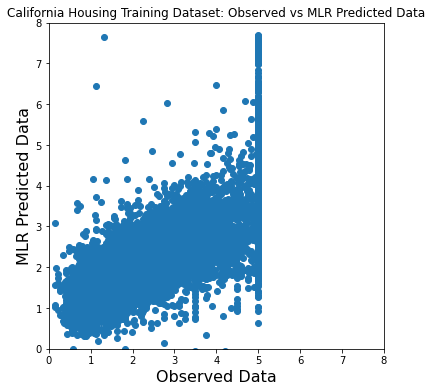

In [48]:
train_pred = lm_trained.predict(train_data.drop(['Housing Price'], axis=1))

plt.figure(figsize=(6, 6))
plt.title('California Housing Training Dataset: Observed vs MLR Predicted Data')
plt.scatter(train_data['Housing Price'], train_pred)
plt.xlabel('Observed Data', size=16)
plt.ylabel('MLR Predicted Data', size=16)
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

In [39]:
# Define function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [45]:
print('Training MSE: {:.3f}'.format(mean_squared_error(train_data['Housing Price'], train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(train_data['Housing Price'], train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(train_data['Housing Price'], train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(train_data['Housing Price'], train_pred)))
print('Training R2: {:.3f}'.format(r2_score(train_data['Housing Price'], train_pred)))

Training MSE: 0.598
Training RMSE: 0.773
Training MAE: 0.571
Training MAPE: 34.601
Training R2: 0.551


Test MSE: 0.619
Test RMSE: 0.787
Test MAE: 0.574
Test MAPE: 34.806
Test R2: 0.536


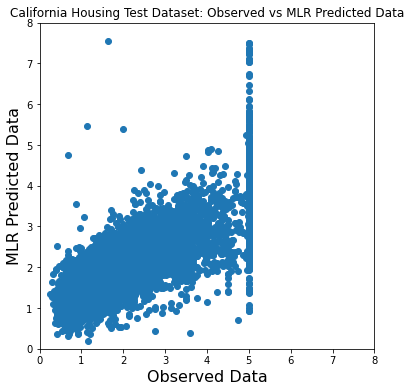

In [50]:
test_pred = lm_trained.predict(test_data.drop(['Housing Price'], axis=1))

plt.figure(figsize=(6, 6))
plt.title('California Housing Test Dataset: Observed vs MLR Predicted Data')
plt.scatter(test_data['Housing Price'], test_pred)
plt.xlabel('Observed Data', size=16)
plt.ylabel('MLR Predicted Data', size=16)
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

print('Test MSE: {:.3f}'.format(mean_squared_error(test_data['Housing Price'], test_pred)))
print('Test RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data['Housing Price'], test_pred))))
print('Test MAE: {:.3f}'.format(mean_absolute_error(test_data['Housing Price'], test_pred)))
print('Test MAPE: {:.3f}'.format(mean_absolute_percentage_error(test_data['Housing Price'], test_pred)))
print('Test R2: {:.3f}'.format(r2_score(test_data['Housing Price'], test_pred)))

**Practice Example 3: Boston Housing Dataset**

In [57]:
# Load BostonHousing Data
boston = pd.read_csv('/content/drive/MyDrive/MLR/data/Boston_house.csv')
print(boston.head())

    AGE       B     RM     CRIM     DIS  INDUS  LSTAT    NOX  PTRATIO  RAD  \
0  65.2  396.90  6.575  0.00632  4.0900   2.31   4.98  0.538     15.3    1   
1  78.9  396.90  6.421  0.02731  4.9671   7.07   9.14  0.469     17.8    2   
2  61.1  392.83  7.185  0.02729  4.9671   7.07   4.03  0.469     17.8    2   
3  45.8  394.63  6.998  0.03237  6.0622   2.18   2.94  0.458     18.7    3   
4  54.2  396.90  7.147  0.06905  6.0622   2.18   5.33  0.458     18.7    3   

     ZN  TAX  CHAS  Target  
0  18.0  296     0    24.0  
1   0.0  242     0    21.6  
2   0.0  242     0    34.7  
3   0.0  222     0    33.4  
4   0.0  222     0    36.2  


In [59]:
print("Number of Observations in Data: {}".format(boston.shape[0]))
print("Number of Variables in Data: {}".format(boston.shape[1]))

Number of Observations in Data: 506
Number of Variables in Data: 14


In [74]:
boston_X = boston.drop(['Target'], axis=1)
boston_target = boston['Target']

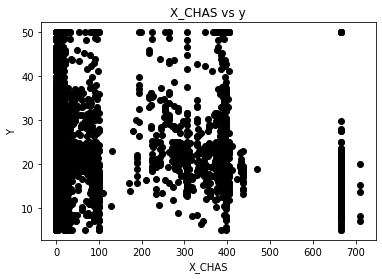

In [78]:
colnames = list(boston_X.columns.values)

for i in range(0, len(colnames)):
  plt.scatter(boston_X.iloc[:, i], boston_target, color='black')
  plt.title('X_{} vs y'.format(colnames[i]))
  plt.xlabel('X_{}'.format(colnames[i]))
  plt.ylabel('Y')
  plt.savefig('/content/drive/MyDrive/MLR/Boston_house_correlation_analysis/X_{} vs y.png'.format(colnames[i]))

In [104]:
# Split training and test dataset
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_target, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Train the Multivariate Linear Regression Model
lm = sm.OLS(y_train, X_train)
lm_trained = lm.fit()
display(lm_trained.summary())

(354, 13) (152, 13) (354,) (152,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              560.6
Date:                Wed, 18 May 2022   Prob (F-statistic):                   4.30e-221
Time:                        08:29:44   Log-Likelihood:                         -1080.6
No. Observations:                 354   AIC:                                      2187.
Df Residuals:                     341   BIC:                                      2237.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.0036      0.017      0.205      0.837      -0.031       0.038
B              0.0164      0.003      4.866      0.000       0.010       0.023
RM             5.4679      0.401     13.649      0.000       4.680       6.256
CRIM          -0.0614      0.044     -1.406      0.161      -0.147       0.024
DIS           -0.9656      0.258     -3.747      0.000      -1.472      -0.459
INDUS         -0.0478      0.085     -0.561      0.575      -0.215       0.120
LSTAT         -0.4510      0.061     -7.382      0.000      -0.571      -0.331
NOX           -2.2342      4.195     -0.533      0.595     -10.485       6.017
PTRATIO       -0.3143      0.137     -2.301      0.022      -0.583      -0.046
RAD            0.1512      0.089      1.702      0.090      -0.023       0.326
ZN             0.0613      0.018      3.354      0.001       0.025       0.097
TAX           -0.0078      0.005     -1.443      0.150      -0.018       0.003
CHAS           2.8435      1.099      2.587      0.010       0.682       5.005
==============================================================================
Omnibus:                      151.390   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.551
Skew:                           1.667   Prob(JB):                    3.95e-212
Kurtosis:                      10.409   Cond. No.                     8.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared = 0.955, meaning that the MLR effectively predicts the housing price given the observations in boston_housing dataset.

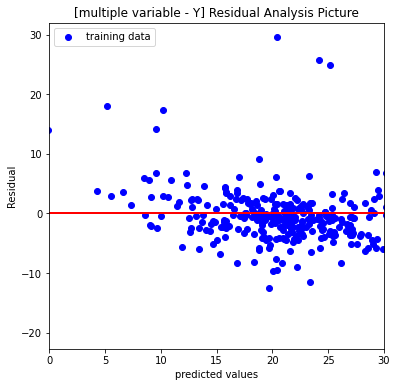

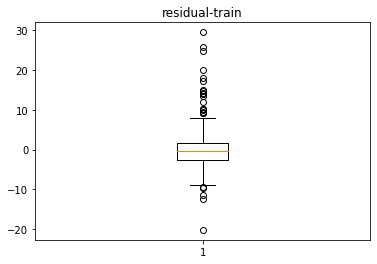

In [105]:
# Check the Model Assumption: Residual by Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid, c = 'blue', marker = 'o', label = 'training data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.hlines(y=0, xmin=0, xmax=30, lw=2, color='red')
plt.xlim([-0, 30])
plt.title('[multiple variable - Y] Residual Analysis Picture')
plt.legend(loc=2)
plt.show()

plt.figure()
plt.boxplot(lm_trained.resid)
plt.title('residual-train')
plt.show()

In [106]:
# Prediction y_train
y_pred_train = lm_trained.predict(X_train)

# Prediction y_test
y_pred_test = lm_trained.predict(X_test)

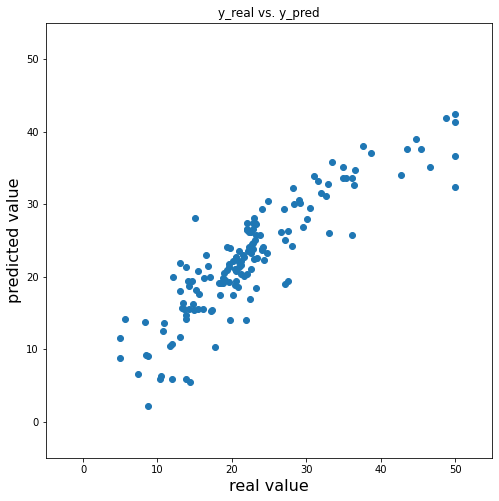

In [107]:
plt.figure(figsize=(8, 8))
plt.title('y_real vs. y_pred')
plt.scatter(y_test, y_pred_test)
plt.xlabel('real value', size = 16)
plt.ylabel('predicted value', size = 16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

In [108]:
# MSE
print(mean_squared_error(y_test, y_pred_test))

# RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

# MAE
print(mean_absolute_error(y_test, y_pred_test))

# MAPE
print(mean_absolute_percentage_error(y_test, y_pred_test))

# Correlation Coefficient
print(np.corrcoef(y_test, y_pred_test))

# R2-Score
print(r2_score(y_test, y_pred_test))

20.110173894242322
4.484436853635284
3.3029035420486665
17.87895743964313
[[1.         0.88524504]
 [0.88524504 1.        ]]
0.7818378936954894


In [110]:
residual_train = y_pred_train - y_train
residual_test = y_pred_test - y_test
print(residual_train.head(10))
print(residual_test.head(10))

99    -0.714005
102    0.077614
416    5.902539
266   -0.309925
101    0.730002
501    3.153111
426    2.483318
33     2.323933
140    2.092544
198   -0.587668
dtype: float64
64    -7.016890
100   -1.263729
400    8.538761
485    0.945983
454    0.518866
288    3.882074
112    1.004788
478    4.792018
66     4.638582
187   -0.483466
dtype: float64


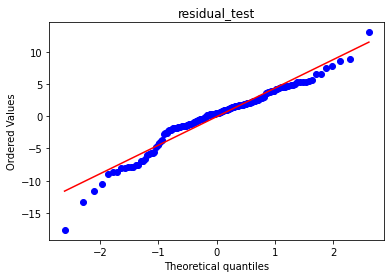

In [112]:
# 잔차에 대한 Q-Q Plot Drawn
stats.probplot(residual_test, dist="norm", plot=pylab)
plt.title('residual_test')
pylab.show()